# Segmentation 
### This Notebook takes a binarized Image with horizontal staff lines image and the output is the Segmented Image
### It takes care of the removing staff lines and splitting the image into different music lines


In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import os
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
import skimage.filters as fr
import skimage as sk
import cv2
%matplotlib inline
%load_ext autoreload
%autoreload 2

27


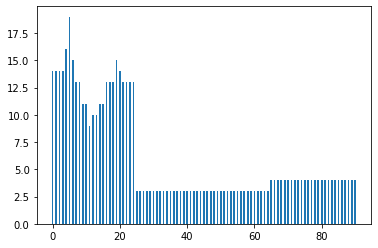

In [17]:
path = '../../objects/test/'

def isHalf(img, spaceHeight):
    w = img.shape[1]
    h = img.shape[0]
    hist = np.zeros((w,4), dtype=np.uint32)
    min_x, max_x = 0, w
    min_y, max_y = 0, h 
    for i in range(w):
        window = img[:, i: min(i + 1, w)]
    #     show_images([window])
        xprojection = np.sum(window, axis=1)
    #     xprojection = np.where(xprojection>spaceHeight//4, 1,0)

        starts = np.array((xprojection[:-1] == 0) & (xprojection[1:] != 0))
        starts_ix = np.where(starts)[0] + 1
        ends = np.array((xprojection[:-1] != 0) & (xprojection[1:] == 0))
        ends_ix = np.where(ends)[0]

        if xprojection[0] != 0:
            starts_ix = np.append(0, starts_ix)

        if xprojection[-1] != 0:
            ends_ix = np.append(ends_ix, xprojection.size-1)

        if starts_ix.size != 0:
            index = np.argmax(ends_ix - starts_ix)
            hist[i,1] = min_x + i
            hist[i,2] = min_y + starts_ix[index]
            hist[i,3] = min_y + ends_ix[index]
            length = hist[i,3] - hist[i,2]
            if 0.5*spaceHeight < length < spaceHeight*1.5:
                hist[i,0] = length
    projections = len(np.where(hist[:,0]>0)[0])
    if projections > img.shape[1]//3:
        return False
    else:
        return True
# img_filenames = os.listdir(path)

# for i, fn in enumerate(img_filenames):
#     p = os.path.join(path, fn)
#     img = cv2.imread(p, 0)
#     print(isHalf(img, 20))

img = cv2.imread(path+'a2.png', 0)
xprojection = np.sum(img//255, axis=1)

plt.bar(range(img.shape[0]), xprojection, width=0.5)
plt.show()
# se = np.ones((1, 7))
# half = binary_opening(half, se)
# quar = binary_opening(quar, se
spaceHeight = 20